In [192]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [59]:
dados = pd.read_csv('consumo_cerveja_sp.csv', sep=',')

dados.head()

,data,temp_med,temp_min,temp_max,precipitacao,finaldesemana,consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28900


In [60]:
dados.isna().sum()

data             0
temp_med         0
temp_min         0
temp_max         0
precipitacao     0
finaldesemana    0
consumo          0
dtype: int64

In [62]:
dados.describe()

,temp_med,temp_min,temp_max,precipitacao,finaldesemana,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


In [63]:
## Removendo NaN
dadosc = dados.copy()
dadosc.dropna(inplace=True)
dadosc.isna().sum()

data             0
temp_med         0
temp_min         0
temp_max         0
precipitacao     0
finaldesemana    0
consumo          0
dtype: int64

In [65]:
dadosc.describe().round(2)

,temp_med,temp_min,temp_max,precipitacao,finaldesemana,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


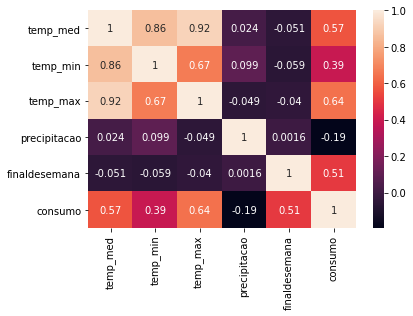

In [69]:
sns.heatmap(dadosc.corr().round(4), annot=True)

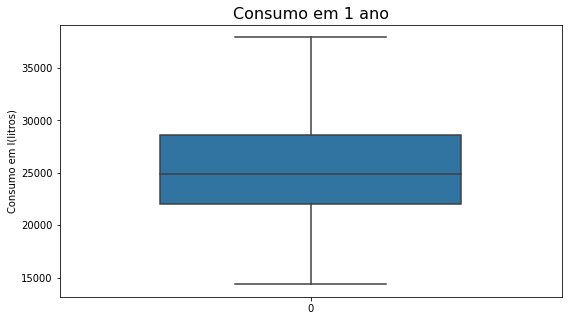

In [77]:
x = sns.boxplot(data=dadosc['consumo'], width=0.6, orient='v')

x.figure.set_size_inches(9,5)
x.set_title('Consumo em 1 ano', fontsize=16)
x.set_ylabel('Consumo em l(litros)', fontsize=10)

x

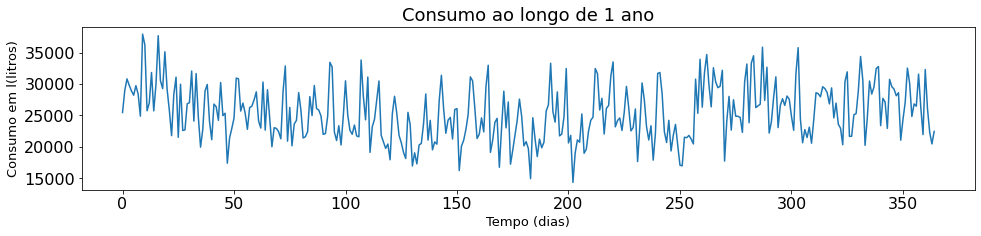

In [83]:
f, x = plt.subplots(figsize=(16,3))

x.set_title('Consumo ao longo de 1 ano', fontsize=18)
x.set_ylabel('Consumo em l(litros)', fontsize=13)
x.set_xlabel('Tempo (dias)', fontsize=13)

x = dadosc['consumo'].plot(fontsize=16)

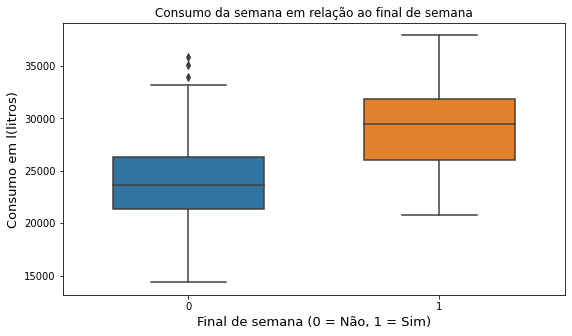

In [85]:
x = sns.boxplot(data=dadosc, y='consumo', x='finaldesemana', orient='v', width=0.6)

x.figure.set_size_inches(9,5)
x.set_title('Consumo da semana em relação ao final de semana')
x.set_ylabel('Consumo em l(litros)', fontsize=13)
x.set_xlabel('Final de semana (0 = Não, 1 = Sim)', fontsize=13)

x

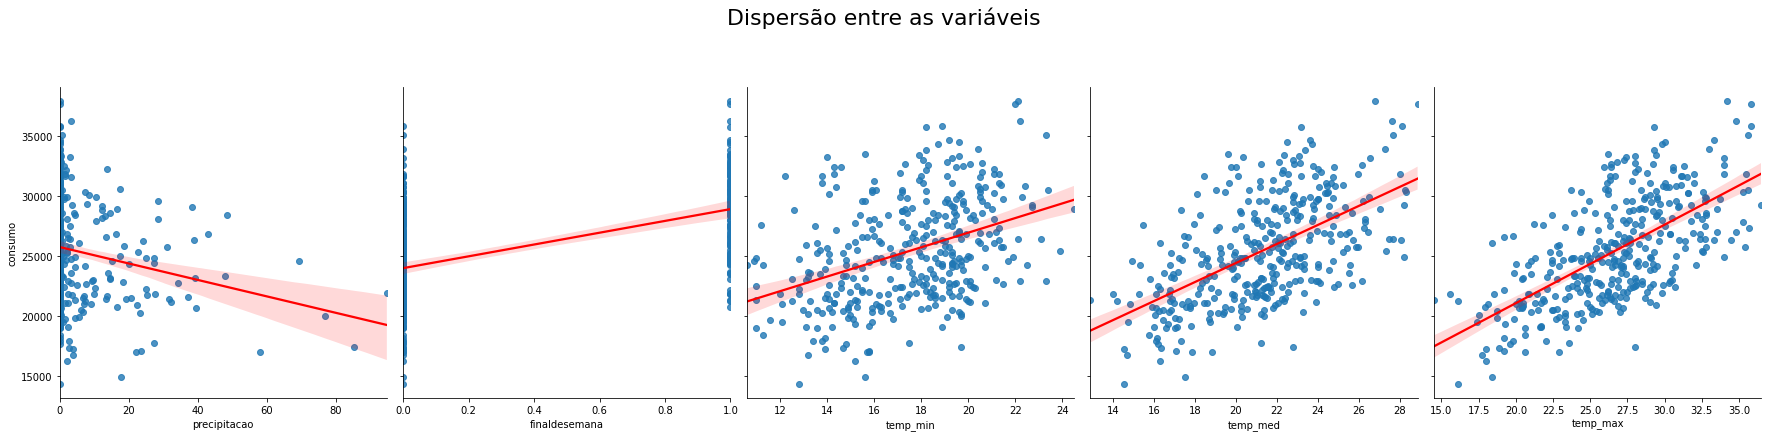

In [105]:
x = sns.pairplot(
    dadosc, y_vars='consumo', x_vars=['precipitacao', 'finaldesemana', 'temp_min', 'temp_med', 'temp_max'],
    height=5,
    kind='reg', plot_kws={'line_kws':{'color':'red'}}
    )
x.fig.suptitle('Dispersão entre as variáveis', y=1.2, fontsize=22)
x

# Regressão Linear

In [153]:
y = dadosc['consumo']
X = dados[['temp_max', 'precipitacao', 'finaldesemana']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [154]:
X_test.shape

(110, 3)

In [155]:
X_train.shape

(255, 3)

In [156]:
m = LinearRegression()

m.fit(X_train, y_train)

print(f"Quanto mais proximo de 1, mais preciso é o valor estimado!\nR^2 = {m.score(X_train, y_train).round(2)}")

Quanto mais proximo de 1, mais preciso é o valor estimado!
R^2 = 0.73


## Testes

In [160]:
y_estimado = m.predict(X_test)

print(f"Quanto mais proximo de 100, mais preciso foi o valor estimado!\nPrecisão de: {metrics.r2_score(y_test, y_estimado).round(2) * 100}%")

Quanto mais proximo de 100, mais preciso foi o valor estimado!
Precisão de: 69.0%


In [168]:
i = m.intercept_
c = m.coef_

In [172]:
print(f"Se chover há uma redução media de {round(c[1],3)} litros de cerveja.")

Se chover a uma redução media de -60.782 litros de cerveja.


In [176]:
print(f"Nos finais de semana o consumo de cerveja sobe em média {round(c[2], 3)} litros.")

Nos finais de semana o consumo de cerveja sobe em média 5401.083 litros.
